# Cavité anneau

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import meep as mp

In [8]:
# Set up the cavity
a = 0.8
b = 1
w = b-a
pml = 0.2
pad = 1
n = 1.5
sr = b + pml + pad 
#len_scale = 10  #micrometer

resolutions = 240
cell = mp.Vector3(sr, 0, 0)

#geometry
geometry = [mp.Block(center = mp.Vector3(a+w/2), 
            size = mp.Vector3(w,mp.inf, mp.inf),
            material = mp.Medium(index=n))]

#dimensions
dimensions = mp.CYLINDRICAL
#PML
pml_layers= [mp.PML(pml)]

#source
#wl = 5.47
#fcen = len_scale/wl
fcen = 7.96
df = 2

src = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component= mp.Ez, center=mp.Vector3(0.7))]

#simulation
m = 30
sim = mp.Simulation(cell_size = cell,
                    geometry = geometry,
                    boundary_layers=pml_layers,
                    resolution=resolutions,
                    dimensions = dimensions,
                    sources= src,
                    m = m)

In [4]:
# define step function to collect field Ez
def append_fields(sim):
    ez_fields.append(sim.get_array(center=pt_observed, size=mp.Vector3(), component=mp.Ez))
    

In [9]:
sim.restart_fields()
ez_fields = []
pt_observed = mp.Vector3(a+0.1)
#h = mp.Harminv(mp.Ez, pt_observed, fcen, df, 2000)

sim.run(mp.after_sources(append_fields),
        #mp.after_sources_and_time(10,h),
        until_after_sources = 300 )

-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in Cylindrical dimensions.
Computational cell is 2.2 x 0 x 0.00416667 with resolution 240
     block, center = (0.9,0,0)
          size (0.2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.00132608 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=305.0)

Meep progress: 59.114583333333336/305.0 = 19.4% done in 4.0s, 16.6s to go
on time step 28451 (time=59.2729), 0.000140595 s/step
Meep progress: 116.80624999999999/305.0 = 38.3% done in 8.0s, 12.9s to go
on time step 56148 (time=116.975), 0.000144422 s/step
Meep progress: 174.72708333333333/305.0 = 57.3% done in 12.0s, 8.9s to go
on time step 83953 (time=174.902), 0.000143862 s/step
Meep progress: 233.58333333333334/305.0 = 76.6% done in 16.0s, 4.9s to go
on time step 112204 (time=233.758), 0.000141589 s/step
Meep progress: 292.8770833333333/305.0 = 96.0% done in 20.0s, 0.8s to go
on time step 140672 (time=293.067), 0.000140512 s/step
run 0 finished at t = 305.0 (146400 timesteps)


<IPython.core.display.Javascript object>


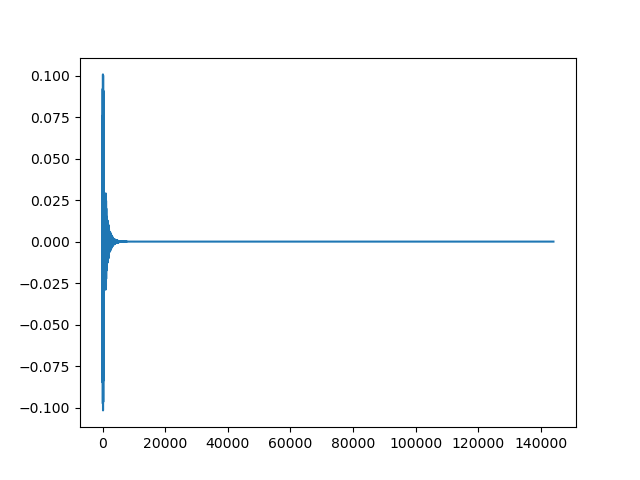

In [10]:
plt.figure()
plt.plot(ez_fields)
plt.show()

In [7]:
eps = sim.get_epsilon()

<IPython.core.display.Javascript object>


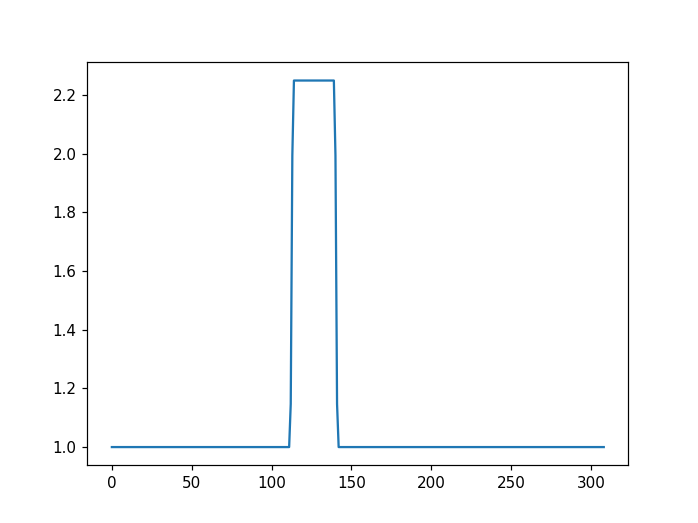

In [8]:
plt.figure()
plt.plot(eps)
plt.show()

In [11]:
#np.savez('ez_cyl_m30_f7.96_df2_t300_res240',ez_fields)